In [ ]:
import numpy as np
import pandas as pd

In [ ]:
X_test = np.arange(11,16,1).reshape(-1,1)
X_test

array([[11],
       [12],
       [13],
       [14],
       [15]])

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris['data'][:7,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3]])

In [ ]:
df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [ ]:
df['Target'] = iris['target'] # df의 target에 iris dataset의 target을 저장장
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,Target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 중복 데이터 다루기

In [ ]:
# 중복 데이터 확인
df.duplicated().sum()

1

In [ ]:
# 중복 데이터 있다면
df.loc[df.duplicated(),:] # 중복되는 행 찾기

,sepal_length,sepal_width,petal_length,petal_width,Target
142,5.8,2.7,5.1,1.9,2


In [ ]:
# 중복되는 행의 데이터를 통해 다른 중복되는 행 찾기
df.loc[(df.sepal_length==5.8) & (df.petal_width==1.9),:]

,sepal_length,sepal_width,petal_length,petal_width,Target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [ ]:
df = df.drop_duplicates()

df.loc[(df.sepal_length==5.8) & (df.petal_width==1.9),:] # 142번 행 알아서 삭제된 것을 확인할 수 있음

,sepal_length,sepal_width,petal_length,petal_width,Target
101,5.8,2.7,5.1,1.9,2


### 상관관계분석석

In [ ]:
# 변수 간의 상관 관계 분석
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,Target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
Target,0.786971,-0.422987,0.949402,0.956514,1.000000


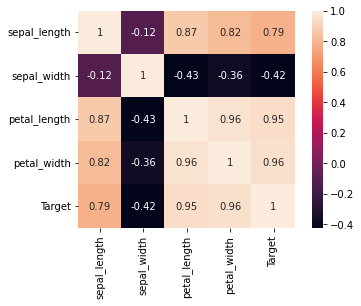

In [ ]:
# 상관 계수 히트맵
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data=df.corr(),square=True,annot=True,cbar=True)
plt.show()

In [ ]:
# 전체적인 데이터 분류 확인
df['Target'].value_counts

<bound method Series.unique of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 149, dtype: int64>

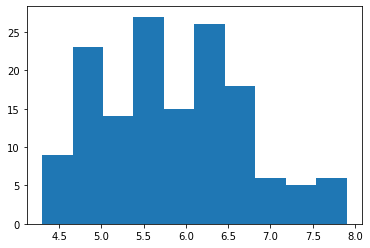

In [ ]:
plt.hist(x='sepal_length',data=df)
plt.show()

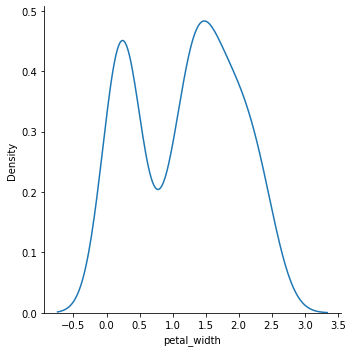

In [ ]:
sns.displot(x='petal_width',kind='kde',data=df)
plt.show()

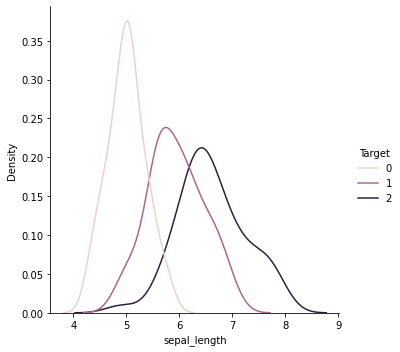

In [ ]:
sns.displot(x='sepal_length',hue='Target',kind='kde',data=df)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


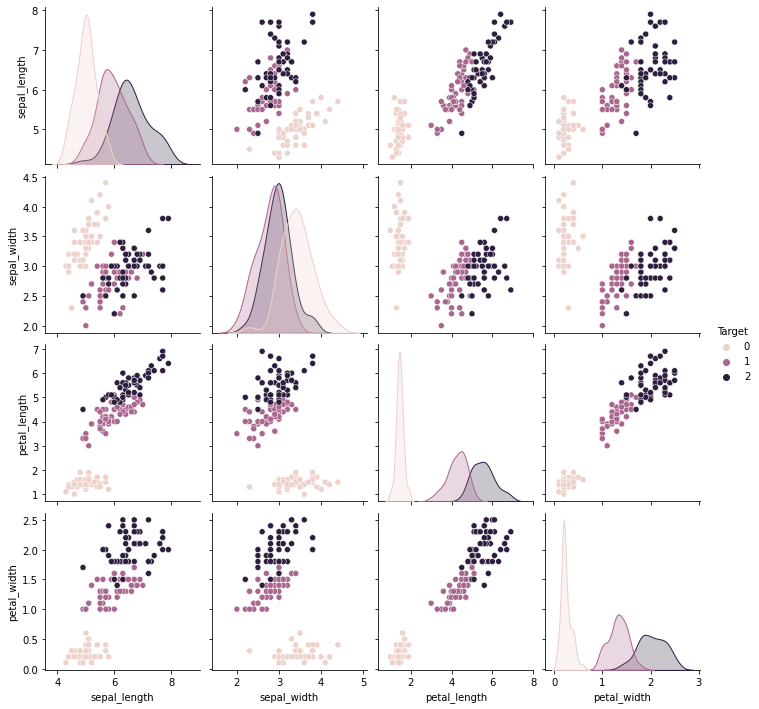

In [ ]:
sns.pairplot(df,hue='Target',size=2.5,diag_kind='kde')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_data = df.loc[:,'sepal_length':'petal_width']
Y_data = df.loc[:,'Target']

In [ ]:
X_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
Y_data

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 149, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,test_size=0.2,
                                                 shuffle=True,
                                                 random_state=20)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(119, 4) (119,)
(30, 4) (30,)


# 분류(Classification) - 1. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_knn_pred = knn.predict(X_test)
print("Predict : ", y_knn_pred[:5])

Predict :  [0 1 1 2 1]


정확도

In [ ]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(Y_test,y_knn_pred)
print("Accuracy : %.4f" %knn_acc)

Accuracy : 0.9667


# AI 모델 기반 서비스

# 버섯 식용 유무 판별 웹서비스

In [ ]:
import pandas as pd
import joblib
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/4학년동계학기/1.SKT FLY AI Challenger/1주차(12.19~12.23)/sample.csv',header=0,encoding='cp949')
df

,status,height,weight,color
0,먹어,7,2,1
1,먹지마,1,5,3
2,먹지마,5,1,4
3,먹어,1,1,7
4,먹지마,1,6,7
5,먹지마,6,2,1
6,먹지마,3,1,5
7,먹지마,1,4,9
8,먹어,2,1,1
9,먹지마,5,7,6


In [ ]:
label = []
data = []
for row_index, row in df.iterrows():
  label.append(row.iloc[0])
  row_data = []
  for v in row.iloc[1:]:
    row_data.append(v)
  data.append(row_data)

In [ ]:
label[0:5]

['먹어', '먹지마', '먹지마', '먹어', '먹지마']

In [ ]:
data

[[7, 2, 1],
 [1, 5, 3],
 [5, 1, 4],
 [1, 1, 7],
 [1, 6, 7],
 [6, 2, 1],
 [3, 1, 5],
 [1, 4, 9],
 [2, 1, 1],
 [5, 7, 6],
 [1, 1, 1],
 [4, 2, 4],
 [4, 1, 10],
 [3, 8, 3],
 [2, 1, 3],
 [2, 1, 3]]

In [ ]:
data_train, data_test, label_train, label_test = train_test_split(data, label)

In [ ]:
# 데이터 학습시키기
clf = RandomForestClassifier()
clf.fit(data_train, label_train)

y_pred = clf.predict(data_test)
ac_score = metrics.accuracy_score(y_pred,label_test)
print(ac_score)

0.75


In [ ]:
# 모델 저장
f = open('./model.pkl','wb')
pickle.dump(clf, f)
f.close()